In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%reload_ext lab_black

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap
from scipy.stats import pearsonr

In [3]:
# load real data: ./sweep_replay_correlation_realdata.pkl
# !!! need to run SeeepAwakeReplayCorrelation.ipynb first to generate the pickle file if not exist
with open("../../Processed-Data/sweep_replay_correlation_realdata.pkl", "rb") as f:
    (
        animal_names,
        all_sweep_len_perday_concat,
        all_sweep_amp_perday_concat,
        all_sweep_ahead_perday_concat,
        all_sweep_behind_perday_concat,
        all_exponent_perday_concat,
        all_ave_activespeed_perday_concat,
    ) = pickle.load(f)

### Control study, shuffle the theat sweep across day, and across animals

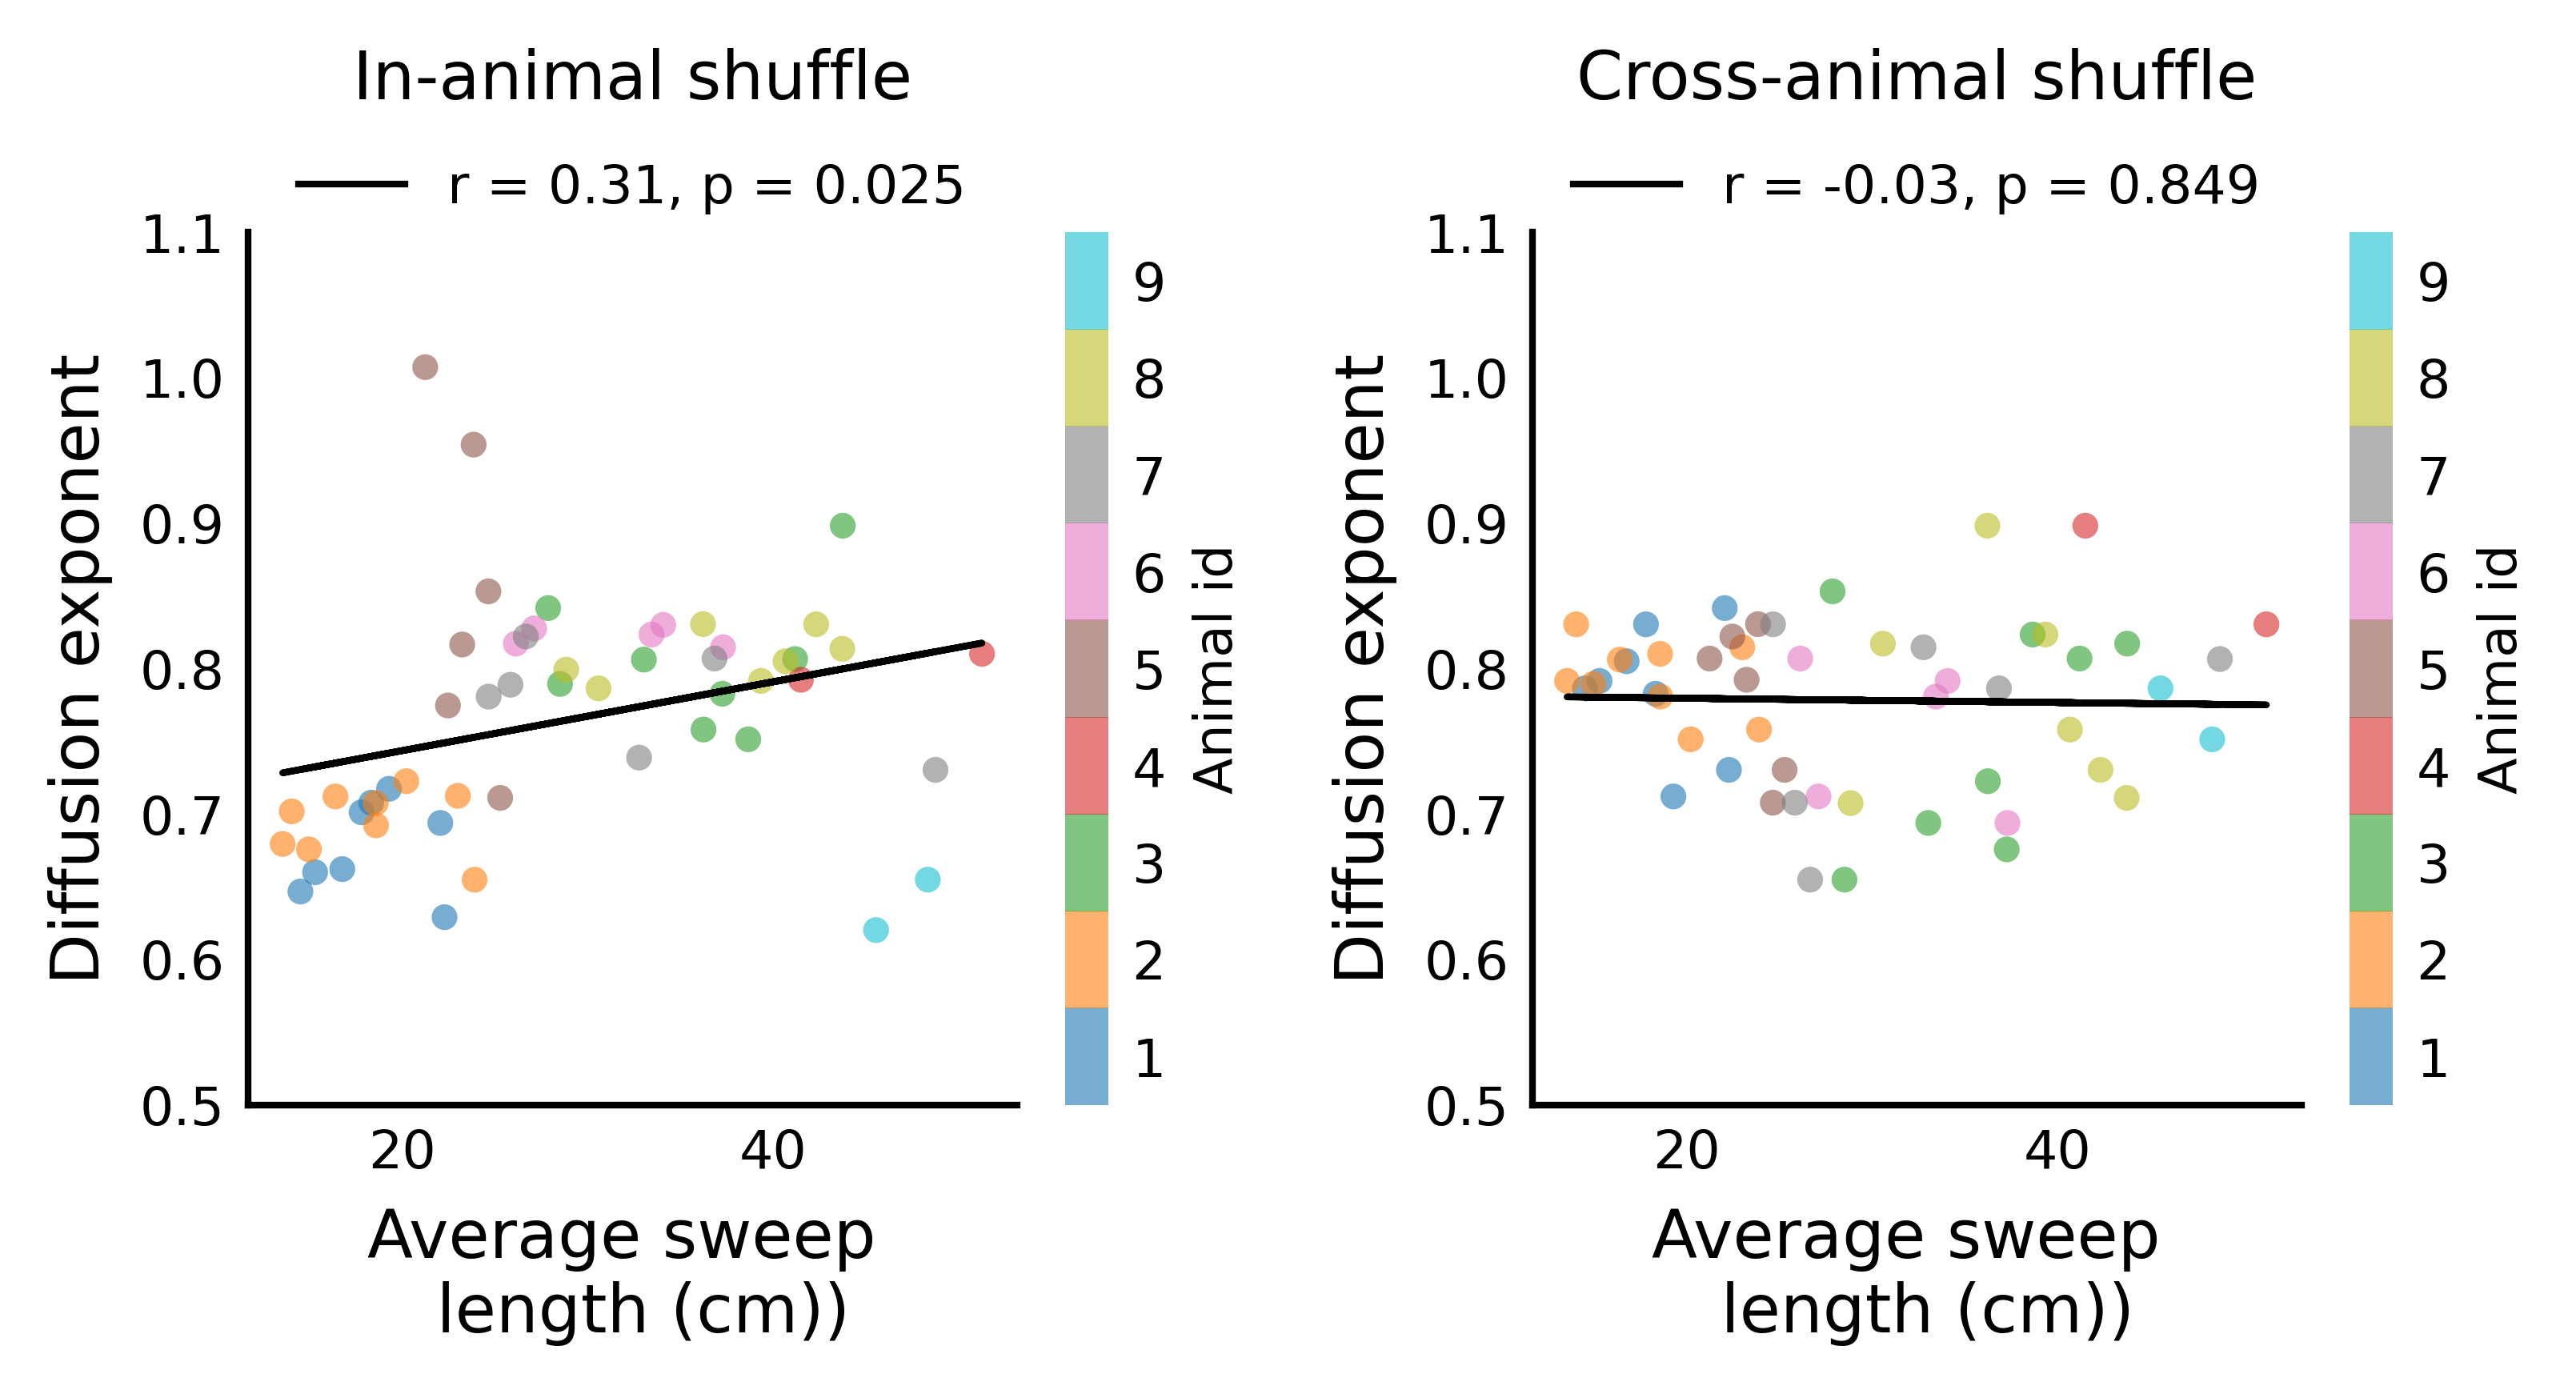

In [19]:
# plot all_exponent_perday_concat_shuffled against all_sweep_len_perday_concat_shuffled
colors = plt.cm.get_cmap("tab10", len(animal_names))
color_dict = {}
for i, name in enumerate(animal_names):
    color_dict[name] = colors(i)

# plot the exponent against average active speed, and intercept against average active speed
plt.figure(figsize=(5.5, 3), dpi=300)
ticksize = 8
labelsize = 10


ax1 = plt.subplot(1, 2, 1)

# for each key in all_exponent_perday_concat, shuffle the values in the list
# store the shuffled values in a new dictionary
all_exponent_perday_concat_shuffled = {}
for key in all_exponent_perday_concat.keys():
    all_exponent_perday_concat_shuffled[key] = np.random.permutation(
        all_exponent_perday_concat[key]
    )

# copy all_sweep_len_perday_concat to a new dictionary
all_sweep_len_perday_concat_shuffled = all_sweep_len_perday_concat.copy()

for name in animal_names:
    plt.scatter(
        np.array(all_sweep_len_perday_concat_shuffled[name]),
        np.array(all_exponent_perday_concat_shuffled[name]),
        s=15,
        alpha=0.6,
        color=color_dict[name],
        edgecolors="none",
    )

# add linear fit line to the plot using numpy.polyfit
# convert all_sweep_len_perday_concat_shuffled and all_exponent_perday_concat_shuffled to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat_shuffled.values()))
sweep_len_np = np.concatenate(list(all_sweep_len_perday_concat_shuffled.values()))
slope, intercept = np.polyfit(sweep_len_np, exp_np, 1)
# pearson test
corr, p = pearsonr(sweep_len_np, exp_np)

# if p<0.001, then add label as 'r = %.2f, p < 0.001'; else add label as 'r = %.2f, p = %.3f'
if p < 0.001:
    ax1.plot(
        sweep_len_np,
        sweep_len_np * slope + intercept,
        "k-",
        label="r = %.2f, p < 0.001" % (corr),
        linewidth=1,
    )
else:
    ax1.plot(
        sweep_len_np,
        sweep_len_np * slope + intercept,
        "k-",
        label="r = %.2f, p = %.3f" % (corr, p),
        linewidth=1,
    )

# legend
ax1.legend(fontsize=ticksize, frameon=False, loc="center", bbox_to_anchor=(0.5, 1.05))

# add colorbar with alpha 0.8
cmap = ListedColormap(color_dict.values())
# Create a ScalarMappable with the colormap and normalize it
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(color_dict)))
# Set the colorbar properties
cbar = plt.colorbar(sm, ax=ax1, ticks=list(range(len(color_dict))), alpha=0.6)
# Set colorbar ticks by adding 1 to each tick
ticks = list(range(len(color_dict)))
cbar.set_ticks([tick + 0.5 for tick in ticks])
# set tick labels by adding 1 to each tick
cbar.set_ticklabels(list(range(1, len(color_dict) + 1)))
# Set colorbar ticklabels by adding 1 to each tick
# Set colorbar label
cbar.set_label("Animal id", fontsize=ticksize)
# remove the box of the colorbar
cbar.outline.set_visible(False)
# set cbar tick size, # remove the short ticks in cbar
cbar.ax.tick_params(labelsize=ticksize, length=0)


ax1.set_title("In-animal shuffle", fontsize=labelsize, pad=20)
ax1.set_xlabel("Average sweep \n length (cm))", fontsize=labelsize)
ax1.set_ylabel("Diffusion exponent", fontsize=labelsize)
ax1.set_ylim([0.5, 1.1])


ax2 = plt.subplot(1, 2, 2)

# for each key in all_exponent_perday_concat, shuffle the values in the list by replacing each of them with a
# random value sampled from other keys, and store the shuffled values in a new dictionary
all_exponent_perday_concat_shuffled_crossanimal = {}
for key in all_exponent_perday_concat.keys():
    # first get all the values except the values under the current key
    all_values = []
    for key2 in all_exponent_perday_concat.keys():
        if key2 != key:
            all_values.extend(all_exponent_perday_concat[key2])
    # then shuffle the values under the current key by sampling the same number of values from all_values
    all_exponent_perday_concat_shuffled_crossanimal[key] = np.random.choice(
        all_values, len(all_exponent_perday_concat[key]), replace=False
    )
# copy all_sweep_len_perday_concat to a new dictionary
all_sweep_len_perday_concat_shuffled_crossanimal = all_sweep_len_perday_concat.copy()

# plot all_exponent_perday_concat_shuffled_crossanimal against all_sweep_len_perday_concat_shuffled_crossanimal
for name in animal_names:
    plt.scatter(
        np.array(all_sweep_len_perday_concat_shuffled_crossanimal[name]),
        np.array(all_exponent_perday_concat_shuffled_crossanimal[name]),
        s=15,
        alpha=0.6,
        color=color_dict[name],
        edgecolors="none",
    )

# add linear fit line to the plot using numpy.polyfit
# convert all_sweep_len_perday_concat_shuffled_crossanimal and all_exponent_perday_concat_shuffled_crossanimal to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat_shuffled_crossanimal.values()))
sweep_len_np = np.concatenate(
    list(all_sweep_len_perday_concat_shuffled_crossanimal.values())
)
slope, intercept = np.polyfit(sweep_len_np, exp_np, 1)

# pearson test
corr, p = pearsonr(sweep_len_np, exp_np)

# if p<0.001, then add label as 'r = %.2f, p < 0.001'; else add label as 'r = %.2f, p = %.3f'
if p < 0.001:
    ax2.plot(
        sweep_len_np,
        sweep_len_np * slope + intercept,
        "k-",
        label="r = %.2f, p < 0.001" % (corr),
        linewidth=1,
    )
else:
    ax2.plot(
        sweep_len_np,
        sweep_len_np * slope + intercept,
        "k-",
        label="r = %.2f, p = %.3f" % (corr, p),
        linewidth=1,
    )

# legend
ax2.legend(fontsize=ticksize, frameon=False, loc="center", bbox_to_anchor=(0.5, 1.05))

# add colorbar with alpha 0.8
cmap = ListedColormap(color_dict.values())
# Create a ScalarMappable with the colormap and normalize it
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(color_dict)))
# Set the colorbar properties
cbar = plt.colorbar(sm, ax=ax2, ticks=list(range(len(color_dict))), alpha=0.6)
# Set colorbar ticks by adding 1 to each tick
ticks = list(range(len(color_dict)))
cbar.set_ticks([tick + 0.5 for tick in ticks])
# set tick labels by adding 1 to each tick
cbar.set_ticklabels(list(range(1, len(color_dict) + 1)))
# Set colorbar ticklabels by adding 1 to each tick
# Set colorbar label
cbar.set_label("Animal id", fontsize=ticksize)
# remove the box of the colorbar
cbar.outline.set_visible(False)
# set cbar tick size, # remove the short ticks in cbar
cbar.ax.tick_params(labelsize=ticksize, length=0)


ax2.set_title("Cross-animal shuffle", fontsize=labelsize, pad=20)
ax2.set_xlabel("Average sweep \n length (cm))", fontsize=labelsize)
ax2.set_ylabel("Diffusion exponent", fontsize=labelsize)
ax2.set_ylim([0.5, 1.1])

for ax in [ax1, ax2]:
    ax.tick_params(labelsize=ticksize)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    # axis line width 1.0
    ax.spines["bottom"].set_linewidth(1.0)
    ax.spines["left"].set_linewidth(1.0)
    # remove the tick bars on the left and bottom
    ax.tick_params(axis="both", which="both", length=0)

plt.tight_layout()


plt.savefig(
    "../../Processed-Data/Paper_figures/FigS2_shuffle.pdf",
    bbox_inches="tight",
    dpi=300,
)